In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('D:/streamlit assigment/streamlit/quality/data/WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
print("Dataset Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (1143, 13)

Data Types:
 fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
Id                        int64
dtype: object

Missing Values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


In [5]:
print("\nSummary Statistics:\n", df.describe())



Summary Statistics:
        fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1143.000000       1143.000000  1143.000000     1143.000000   
mean        8.311111          0.531339     0.268364        2.532152   
std         1.747595          0.179633     0.196686        1.355917   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.392500     0.090000        1.900000   
50%         7.900000          0.520000     0.250000        2.200000   
75%         9.100000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1143.000000          1143.000000           1143.000000  1143.000000   
mean      0.086933            15.615486             45.914698     0.996730   
std       0.047267            10.250486             32.782130     0.001925   
min       0.012000        

In [6]:
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])


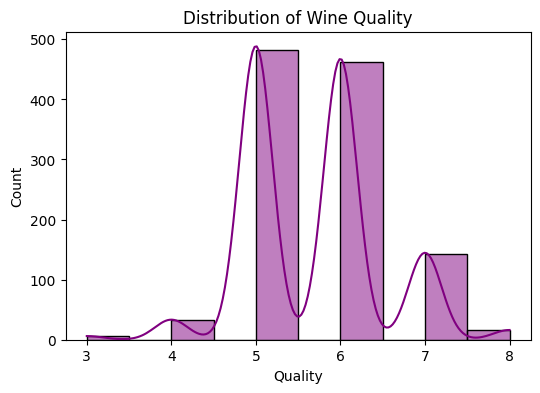

In [7]:
plt.figure(figsize=(6,4))
sns.histplot(df['quality'], kde=True, bins=10, color='purple')
plt.title("Distribution of Wine Quality")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

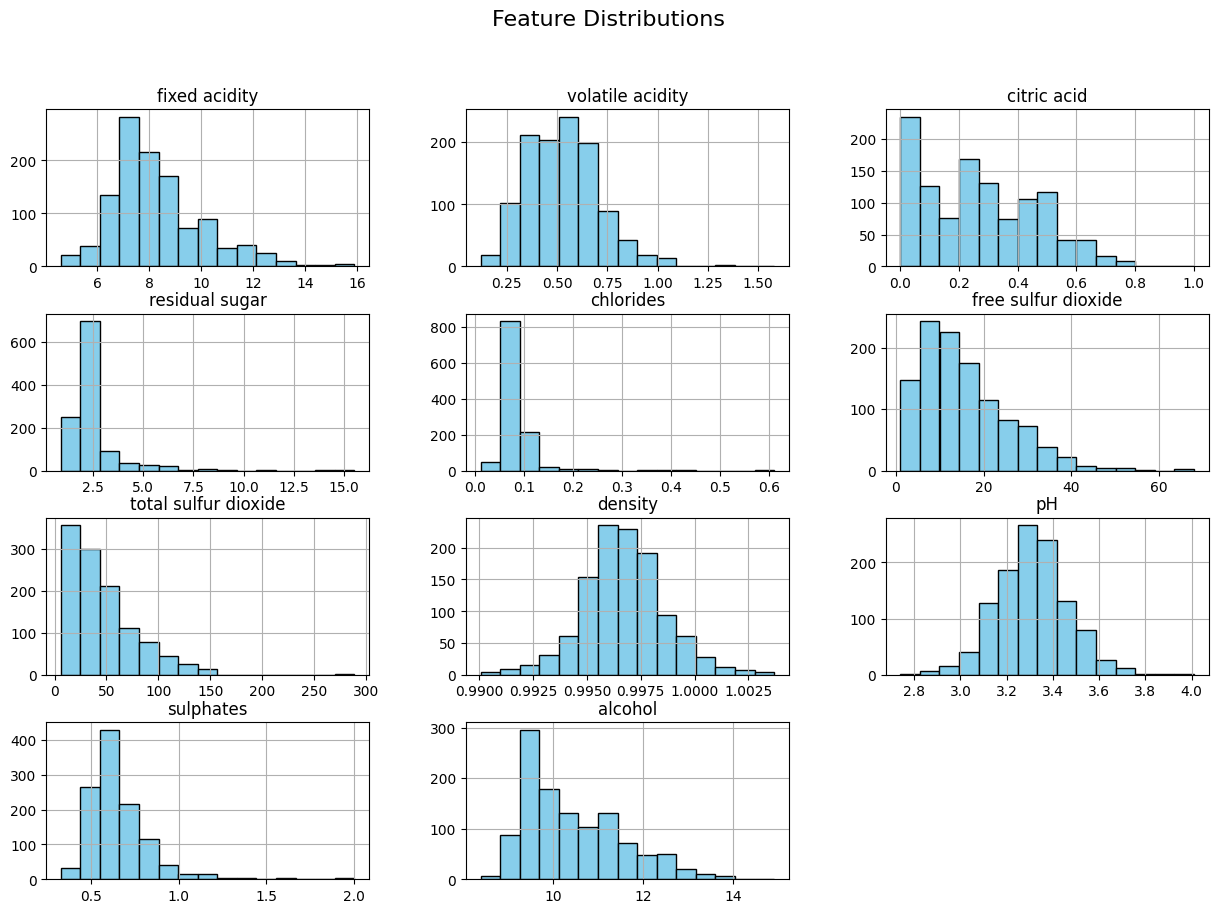

In [8]:
df.drop(columns=['quality']).hist(bins=15, figsize=(15,10), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

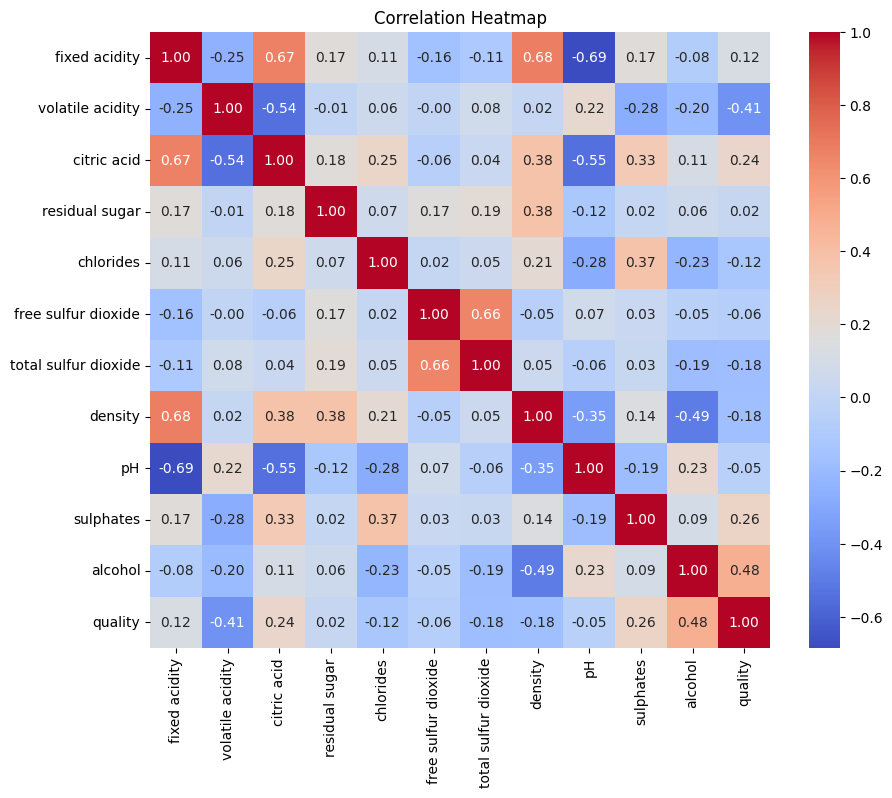

In [9]:
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [10]:
target_corr = corr_matrix['quality'].drop('quality').sort_values(ascending=False)
print("\nTop Correlated Features with Quality:\n", target_corr)


Top Correlated Features with Quality:
 alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64


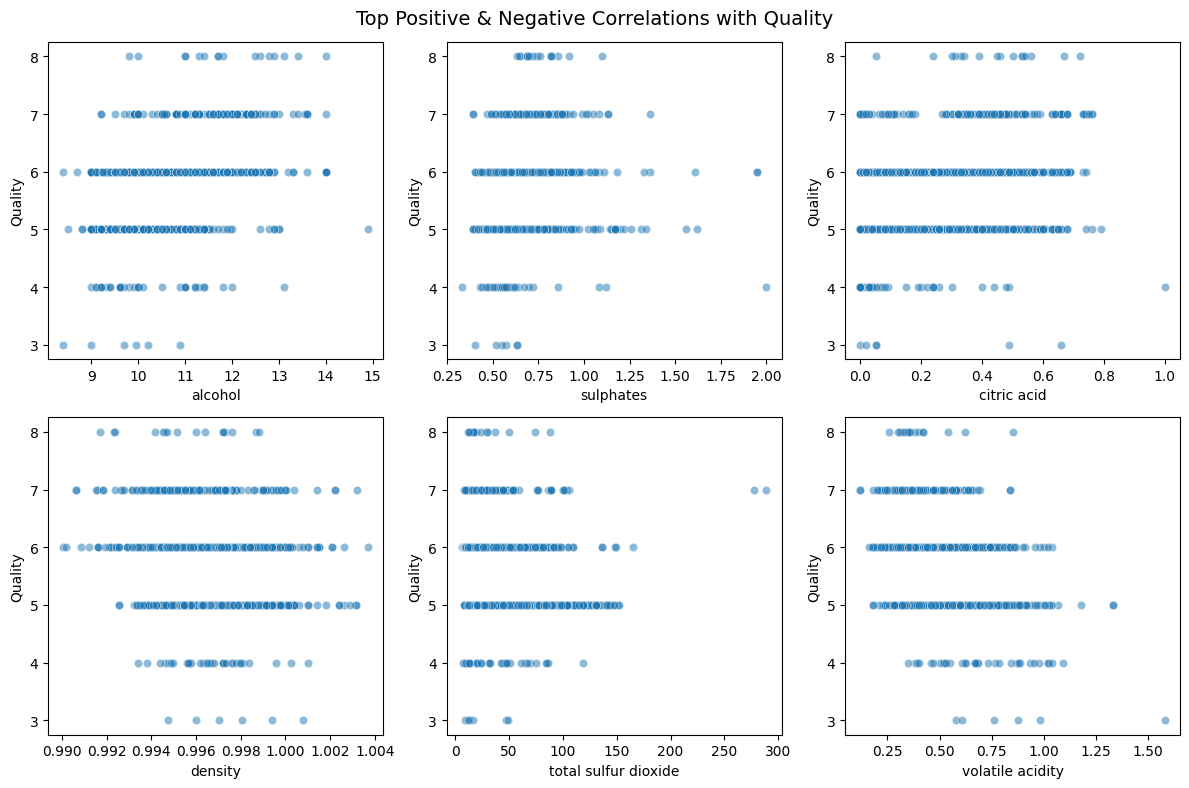

In [11]:
top_features = target_corr.head(3).index.tolist() + target_corr.tail(3).index.tolist()
plt.figure(figsize=(12,8))
for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[feature], y=df['quality'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Quality")
plt.suptitle("Top Positive & Negative Correlations with Quality", fontsize=14)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['quality'])
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\nTraining set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (914, 11)
Testing set shape: (229, 11)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pickle

In [14]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

lr_preds = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression Performance:")
print(f"RMSE: {lr_rmse:.4f}")
print(f"R²: {lr_r2:.4f}")

Linear Regression Performance:
RMSE: 0.6165
R²: 0.3171


In [15]:
top_features = ['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'density', 'total sulfur dioxide']

X = df[top_features]
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

rf_preds = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
rf_r2 = r2_score(y_test, rf_preds)

print("\nRandom Forest Regressor Performance:")
print(f"RMSE: {rf_rmse:.4f}")
print(f"R²: {rf_r2:.4f}")


Random Forest Regressor Performance:
RMSE: 0.5724
R²: 0.4113


In [16]:
if rf_rmse < lr_rmse:
    best_model = rf_model
    print("\nBest Model: Random Forest Regressor")
else:
    best_model = lr_model
    print("\nBest Model: Linear Regression")


Best Model: Random Forest Regressor


In [17]:
import json

metrics = {
    "LinearRegression": {
        "RMSE": lr_rmse,
        "R2": lr_r2
    },
    "RandomForestRegressor": {
        "RMSE": rf_rmse,
        "R2": rf_r2
    },
    "BestModel": "RandomForestRegressor" if rf_rmse < lr_rmse else "LinearRegression"
}

with open("../metrics.json", "w") as f:
    json.dump(metrics, f, indent=4)


In [18]:
with open("../model.pkl", "wb") as f:  # Save one folder up from notebooks/
    pickle.dump(best_model, f)

print("\nModel saved as model.pkl")


Model saved as model.pkl
